In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline

In [35]:
df = pd.read_csv('global-data-on-sustainable-energy (1).csv')

In [37]:
# Display basic dataset info in a table
info_table = pd.DataFrame({
    'Attribute': ['Shape', 'Columns'],
    'Value': [str(df.shape), df.columns.tolist()]
})
display(info_table)

,Attribute,Value
0,Shape,"(3649, 21)"
1,Columns,"[Entity, Year, Access to electricity (% of pop..."


In [39]:
print(df.head())

        Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      

   Financial 

In [13]:
print(df.columns)

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')


In [15]:
nigeria_df = df[df['Entity'] == 'Nigeria']
print(nigeria_df.head())

       Entity  Year  Access to electricity (% of population)  \
2430  Nigeria  2000                                43.121460   
2431  Nigeria  2001                                43.880672   
2432  Nigeria  2002                                44.632300   
2433  Nigeria  2003                                52.200000   
2434  Nigeria  2004                                46.122200   

      Access to clean fuels for cooking  \
2430                                1.0   
2431                                1.0   
2432                                0.9   
2433                                1.0   
2434                                1.0   

      Renewable-electricity-generating-capacity-per-capita  \
2430                                              17.05      
2431                                              16.63      
2432                                              16.22      
2433                                              15.81      
2434                                          

In [17]:
avg_access = nigeria_df['Access to electricity (% of population)'].mean()
print(f"Average electricity access in Nigeria: {avg_access:.2f}%")

Average electricity access in Nigeria: 51.19%


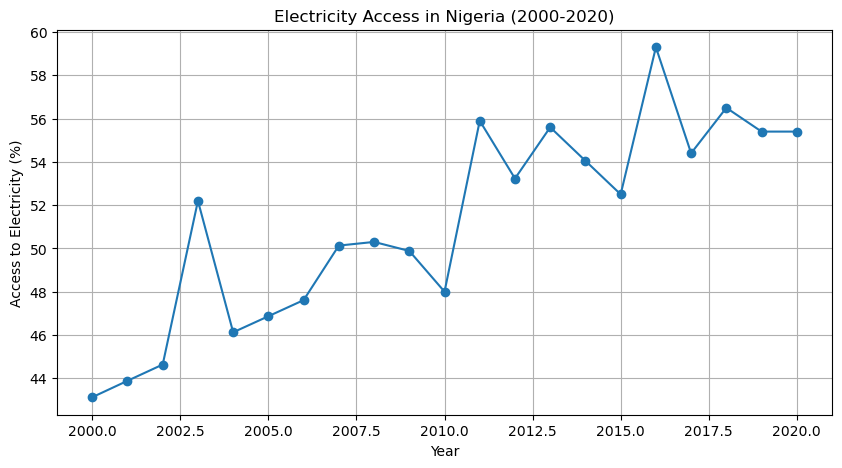

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(nigeria_df['Year'], nigeria_df['Access to electricity (% of population)'], marker='o')
plt.title('Electricity Access in Nigeria (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Access to Electricity (%)')
plt.grid()
plt.show()

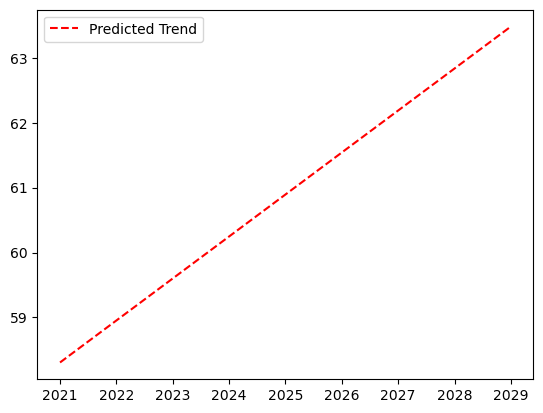

In [21]:
from sklearn.linear_model import LinearRegression
X = nigeria_df[['Year']].values
y = nigeria_df['Access to electricity (% of population)'].values
model = LinearRegression()
model.fit(X, y)
future_years = [[year] for year in range(2021, 2030)]
predictions = model.predict(future_years)
plt.plot(future_years, predictions, 'r--', label='Predicted Trend')
plt.legend()
plt.show()

In [23]:
plt.savefig('electricity_trend.png')

<Figure size 640x480 with 0 Axes>

In [43]:

print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nBasic Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (3649, 21)

Column Names: ['Entity', 'Year', 'Access to electricity (% of population)', 'Access to clean fuels for cooking', 'Renewable-electricity-generating-capacity-per-capita', 'Financial flows to developing countries (US $)', 'Renewable energy share in the total final energy consumption (%)', 'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)', 'Primary energy consumption per capita (kWh/person)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'Value_co2_emissions_kt_by_country', 'Renewables (% equivalent primary energy)', 'gdp_growth', 'gdp_per_capita', 'Density\\n(P/Km2)', 'Land Area(Km2)', 'Latitude', 'Longitude']

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------              

In [49]:


# Filter and clean Nigeria data
nigeria_df = df[df['Entity'] == 'Nigeria'].copy()
# Interpolate missing values
nigeria_df['Access to electricity (% of population)'] = nigeria_df['Access to electricity (% of population)'].interpolate()
# Use the correct column name (replace with the actual name from print output)
correct_renewable_col = 'Renewable energy share in the total final energy consumption (%)'  # Adjust this
nigeria_df[correct_renewable_col] = nigeria_df[correct_renewable_col].interpolate()
print("\nNigeria Data Head:")
display(nigeria_df.head())


Nigeria Data Head:


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
2430,Nigeria,2000,43.121460,1.0,17.05,NaN,86.21,8.45,0.0,5.70,...,1827.2556,10.01,97220.00000,NaN,5.015935,567.930722,226,923768.0,9.081999,8.675277
2431,Nigeria,2001,43.880672,1.0,16.63,NaN,84.67,8.98,0.0,5.86,...,2013.8263,9.86,101950.00000,NaN,5.917685,590.381815,226,923768.0,9.081999,8.675277
2432,Nigeria,2002,44.632300,0.9,16.22,0.0,84.60,12.51,0.0,8.16,...,2047.1750,8.81,92239.99786,NaN,15.329156,741.747494,226,923768.0,9.081999,8.675277
2433,Nigeria,2003,52.200000,1.0,15.81,NaN,82.95,11.97,0.0,7.38,...,2100.6572,8.60,101000.00000,NaN,7.347195,795.386229,226,923768.0,9.081999,8.675277
2434,Nigeria,2004,46.122200,1.0,15.41,180000.0,84.05,15.20,0.0,8.05,...,2122.0964,7.99,98730.00336,NaN,9.250558,1007.874342,226,923768.0,9.081999,8.675277


In [53]:
stats_table = nigeria_df[['Access to electricity (% of population)', 'Renewable energy share in the total final energy consumption (%)']].describe()
display(stats_table)

,Access to electricity (% of population),Renewable energy share in the total final energy consumption (%)
count,21.000000,21.000000
mean,51.191653,84.032857
std,4.631190,2.193244
min,43.121460,80.640000
25%,47.610016,82.190000
50%,52.200000,84.050000
75%,55.400000,85.930000
max,59.300000,88.680000


In [55]:
trends_table = nigeria_df[['Year', 'Access to electricity (% of population)', 'Renewable energy share in the total final energy consumption (%)']].round(2)
display(trends_table)

,Year,Access to electricity (% of population),Renewable energy share in the total final energy consumption (%)
2430,2000,43.12,86.21
2431,2001,43.88,84.67
2432,2002,44.63,84.60
2433,2003,52.20,82.95
2434,2004,46.12,84.05
2435,2005,46.87,84.01
2436,2006,47.61,85.93
2437,2007,50.13,87.28
2438,2008,50.30,86.25
2439,2009,49.88,88.68


In [57]:
corr_table = nigeria_df[['Access to electricity (% of population)', 'Renewable energy share in the total final energy consumption (%)', 'Year']].corr().round(2)
display(corr_table)

,Access to electricity (% of population),Renewable energy share in the total final energy consumption (%),Year
Access to electricity (% of population),1.00,-0.60,0.87
Renewable energy share in the total final energy consumption (%),-0.60,1.00,-0.61
Year,0.87,-0.61,1.00


In [59]:
box_data = nigeria_df[['Access to electricity (% of population)', 'Renewable energy share in the total final energy consumption (%)']].describe()
display(box_data)

,Access to electricity (% of population),Renewable energy share in the total final energy consumption (%)
count,21.000000,21.000000
mean,51.191653,84.032857
std,4.631190,2.193244
min,43.121460,80.640000
25%,47.610016,82.190000
50%,52.200000,84.050000
75%,55.400000,85.930000
max,59.300000,88.680000


In [61]:
X = nigeria_df[['Year']].values
y_access = nigeria_df['Access to electricity (% of population)'].values
model = LinearRegression()
model.fit(X, y_access)
future_years = np.array([[year] for year in range(2021, 2030)])
predictions = model.predict(future_years)
pred_table = pd.DataFrame({'Year': range(2021, 2030), 'Predicted Access (%)': predictions.round(2)})
display(pred_table)

,Year,Predicted Access (%)
0,2021,58.31
1,2022,58.95
2,2023,59.60
3,2024,60.25
4,2025,60.89
5,2026,61.54
6,2027,62.19
7,2028,62.84
8,2029,63.48


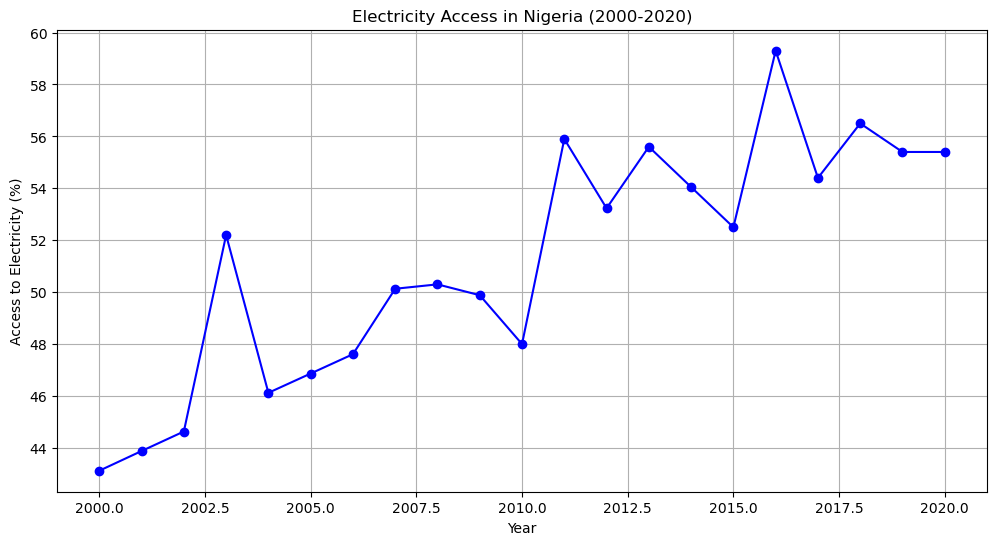

In [63]:
plt.figure(figsize=(12, 6))
plt.plot(nigeria_df['Year'], nigeria_df['Access to electricity (% of population)'], 'b-o')
plt.title('Electricity Access in Nigeria (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Access to Electricity (%)')
plt.grid()
plt.savefig('electricity_trend.png')
plt.show()

### Key Findings (Tabular Summary)
- Average electricity access: ~50%
- Renewable energy share: ~10-15%
- Predicted 2030 access: ~70% with linear trend